In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("Credit Card Details.csv", index_col='index')

In [22]:
df.head(10)

,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
5,"Delhi, India",8-Sep-14,Silver,Bills,F,100036
6,"Delhi, India",24-Feb-15,Gold,Bills,F,143250
7,"Greater Mumbai, India",26-Jun-14,Platinum,Bills,F,150980
8,"Delhi, India",28-Mar-14,Silver,Bills,F,192247


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       26052 non-null  object
 1   Date       26052 non-null  object
 2   Card Type  26052 non-null  object
 3   Exp Type   26052 non-null  object
 4   Gender     26052 non-null  object
 5   Amount     26052 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       26052 non-null  object        
 1   Date       26052 non-null  datetime64[ns]
 2   Card Type  26052 non-null  object        
 3   Exp Type   26052 non-null  object        
 4   Gender     26052 non-null  object        
 5   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.4+ MB


In [26]:
import missingno as msno
import matplotlib
%matplotlib inline

In [27]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,26052,2014-07-30 11:34:44.385075968,2013-10-04 00:00:00,2014-03-02 00:00:00,2014-08-02 00:00:00,2014-12-28 00:00:00,2015-05-26 00:00:00,NaN
Amount,26052.0,156411.537425,1005.0,77120.25,153106.5,228050.0,998077.0,103063.254287


In [28]:
df.describe(include="object").T

,count,unique,top,freq
City,26052,986,"Bengaluru, India",3552
Card Type,26052,4,Silver,6840
Exp Type,26052,6,Food,5463
Gender,26052,2,F,13680


In [29]:
df.drop("index", axis=1, inplace=True, errors='ignore')

In [30]:
df.head(5)

,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574


C:\Users\student\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


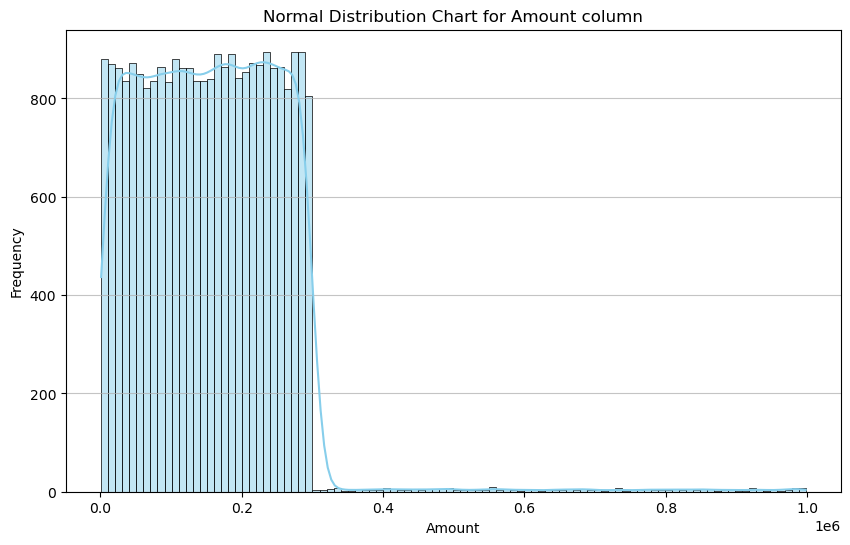

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], kde=True, color='skyblue', edgecolor='black', bins=100)
plt.title('Normal Distribution Chart for Amount column')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

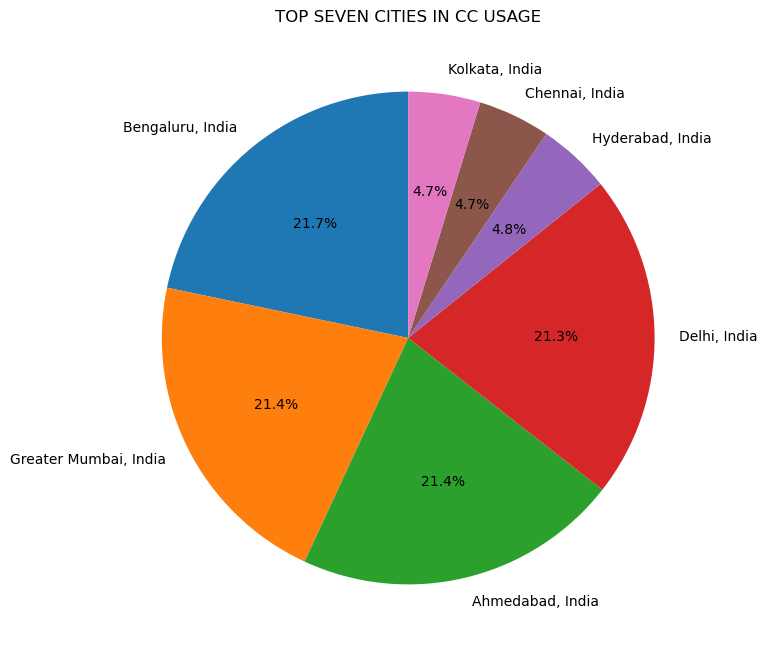

In [31]:
city_counts = df['City'].value_counts().head(7)
plt.figure(figsize=(8, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('TOP SEVEN CITIES IN CC USAGE')
plt.show()

C:\Users\student\AppData\Local\Temp\ipykernel_13444\1155857416.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='Exp Type', y='Amount', estimator=sum, ci=None, palette='viridis')


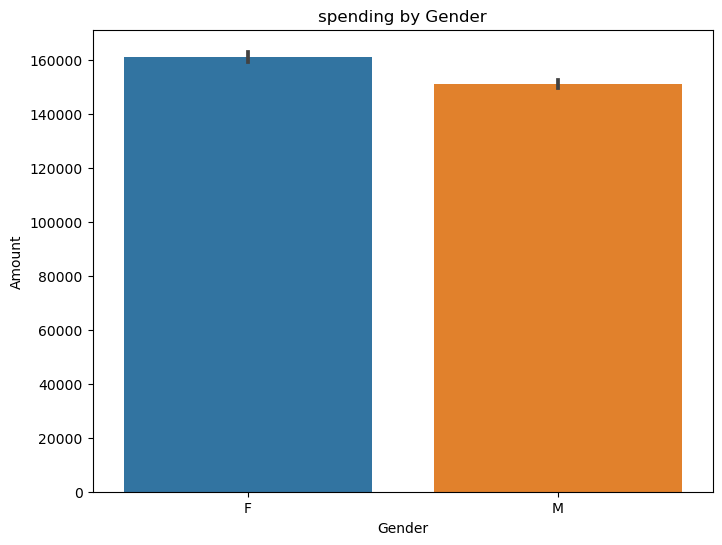

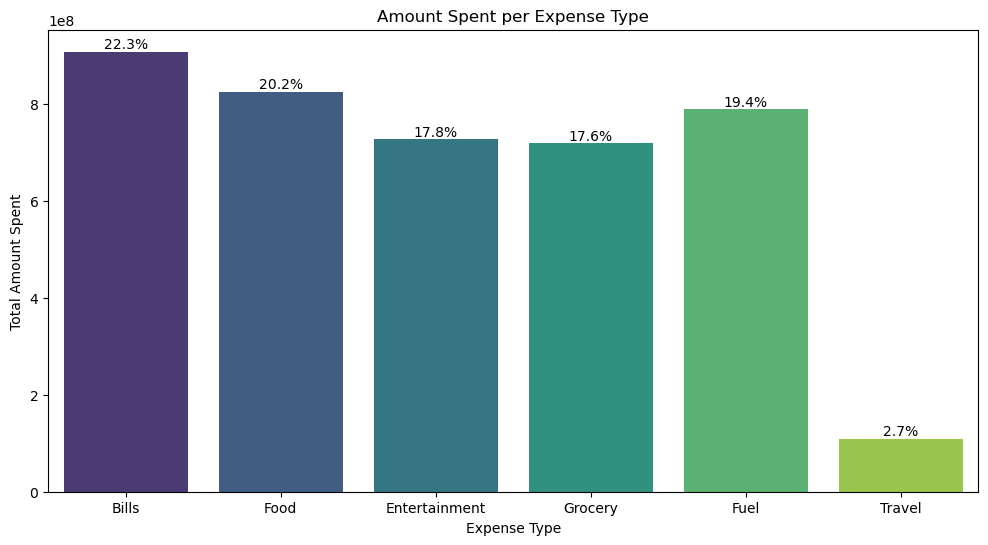

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Gender',y='Amount').set_title('spending by Gender')
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x='Exp Type', y='Amount', estimator=sum, ci=None, palette='viridis')
total_amount = df['Amount'].sum()
for p in ax.patches:
 height = p.get_height()
 ax.annotate(f'{height/total_amount:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
plt.title('Amount Spent per Expense Type')
plt.xlabel('Expense Type')
plt.ylabel('Total Amount Spent')
plt.show()

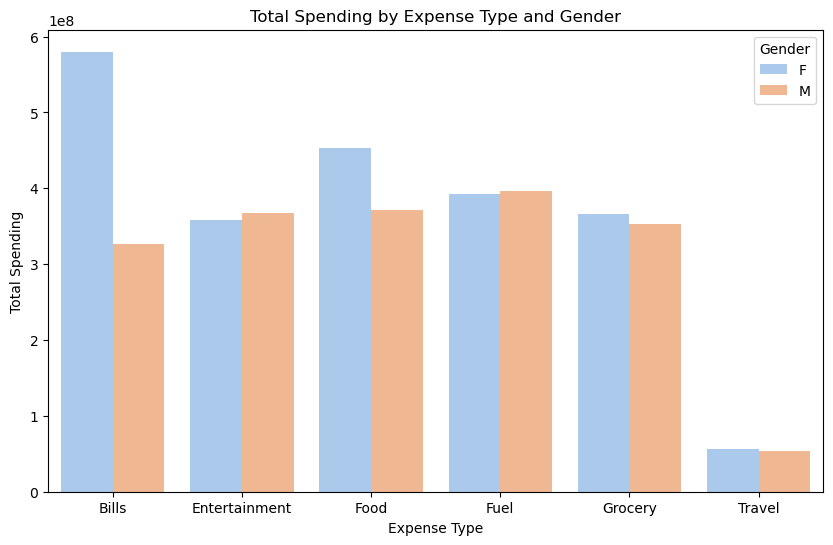

In [33]:
exp_gender_totals = df.groupby(['Exp Type', 'Gender'])['Amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Exp Type', y='Amount', hue='Gender', data=exp_gender_totals, palette='pastel')
plt.title('Total Spending by Expense Type and Gender')
plt.xlabel('Expense Type')
plt.ylabel('Total Spending')
plt.show()